# Yandex.Afisha Marketing Expense Optimization Analysis

##### This notebook contains server logs with data on Yandex.Afisha visits from June 2017 through May 2018, along with a dump file for the period and expense statistics.

##### We will use this data to study how people use the product, when they start to buy, how much money each customer brings, and when customers 'pay off' in terms of LTV.

##### Finally, at the end of the report we will use our data insights to help the marketing team understand where their budget is best spent.

In [74]:
# Let's begin by importing basic libraries that we'll need
import pandas as pd
import numpy as np
from datetime import datetime
import sidetable
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go


In [75]:
visits = pd.read_csv('visits_log_us.csv')

In [76]:
visits.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Device     359400 non-null  object
 1   End Ts     359400 non-null  object
 2   Source Id  359400 non-null  int64 
 3   Start Ts   359400 non-null  object
 4   Uid        359400 non-null  uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 79.3 MB


In [77]:
visits['Device'].value_counts()

desktop    262567
touch       96833
Name: Device, dtype: int64

In [78]:
visits['Device'] = visits['Device'].astype('category')

In [79]:
visits.head(10)

,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168
5,desktop,2017-09-03 21:36:00,5,2017-09-03 21:35:00,16007536194108375387
6,desktop,2018-01-30 12:09:00,1,2018-01-30 11:13:00,6661610529277171451
7,touch,2017-11-05 15:15:00,3,2017-11-05 15:14:00,11423865690854540312
8,desktop,2017-07-19 10:44:00,3,2017-07-19 10:41:00,2987360259350925644
9,desktop,2017-11-08 13:43:00,5,2017-11-08 13:42:00,1289240080042562063


In [80]:
# let's see how much memory we saved in memory usage
visits.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype   
---  ------     --------------   -----   
 0   Device     359400 non-null  category
 1   End Ts     359400 non-null  object  
 2   Source Id  359400 non-null  int64   
 3   Start Ts   359400 non-null  object  
 4   Uid        359400 non-null  uint64  
dtypes: category(1), int64(1), object(2), uint64(1)
memory usage: 57.9 MB


In [81]:
# not a lot of memory was saved. Let's move on to other object columns
visits['End Ts'] = pd.to_datetime(visits['End Ts'])
visits['Start Ts'] = pd.to_datetime(visits['Start Ts'])

In [82]:
# Massive savings in memory! Last thing - let's make columns lowercase.
visits.columns = visits.columns.str.lower()
visits.head(5)

,device,end ts,source id,start ts,uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


In [141]:
visits['week'] = visits['start ts'].astype('datetime64[W]')
visits['month'] = visits['start ts'].astype('datetime64[M]')
visits['year'] = visits['start ts'].dt.year

visits.head()

,device,end ts,source id,start ts,uid,week,month,year,day_of_week,session_length
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-12-20 17:20:00,2017-12-20 17:20:00,2017,Wednesday,0 days 00:18:00
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-02-19 16:53:00,2018-02-19 16:53:00,2018,Monday,0 days 00:28:00
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-07-01 01:54:00,2017-07-01 01:54:00,2017,Saturday,0 days 00:00:00
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-05-20 10:59:00,2018-05-20 10:59:00,2018,Sunday,0 days 00:24:00
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017-12-27 14:06:00,2017-12-27 14:06:00,2017,Wednesday,0 days 00:00:00


In [84]:
# moving on to the next dataset: orders
orders = pd.read_csv('orders_log_us.csv')
orders.info(memory_usage='deep')
orders.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Buy Ts   50415 non-null  object 
 1   Revenue  50415 non-null  float64
 2   Uid      50415 non-null  uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 4.4 MB


,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450
5,2017-06-01 08:43:00,0.18,10402394430196413321
6,2017-06-01 08:54:00,1.83,12464626743129688638
7,2017-06-01 09:22:00,1.22,3644482766749211722
8,2017-06-01 09:22:00,3.30,17542070709969841479
9,2017-06-01 09:23:00,0.37,1074355127080856382


In [85]:
# slightly smaller dataset, but still using object columns. Let's make Buy Ts dtype datetime
orders['Buy Ts'] = pd.to_datetime(orders['Buy Ts'], format="%Y.%m.%d %H:%M")
orders.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Buy Ts   50415 non-null  datetime64[ns]
 1   Revenue  50415 non-null  float64       
 2   Uid      50415 non-null  uint64        
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB


In [86]:
# let's make these columns lowercase as well
orders.columns = orders.columns.str.lower()
orders.head(3)

,buy ts,revenue,uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844


In [87]:
# nice! This dataset is workable now. Let's move on to the last one!
costs = pd.read_csv('costs_us.csv')
costs.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   source_id  2542 non-null   int64  
 1   dt         2542 non-null   object 
 2   costs      2542 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 206.2 KB


In [88]:
# another object column taking up too much space. Let's take a look at what dt entails
costs.head(10)

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08
5,1,2017-06-06,40.39
6,1,2017-06-07,40.59
7,1,2017-06-08,56.63
8,1,2017-06-09,40.16
9,1,2017-06-10,43.24


In [89]:
# dt is a datetime column. Let's make that column datetime format
costs['dt'] = pd.to_datetime(costs['dt'])
costs.info(memory_usage='deep')
costs.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   source_id  2542 non-null   int64         
 1   dt         2542 non-null   datetime64[ns]
 2   costs      2542 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 59.7 KB


,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


In [90]:
costs['year'] = costs['dt'].astype('datetime64[Y]')
costs['month'] = costs['dt'].astype('datetime64[M]')
costs['week'] = costs['dt'].astype('datetime64[W]')

In [91]:
costs.head()

,source_id,dt,costs,year,month,week
0,1,2017-06-01,75.20,2017-06-01,2017-06-01,2017-06-01
1,1,2017-06-02,62.25,2017-06-02,2017-06-02,2017-06-02
2,1,2017-06-03,36.53,2017-06-03,2017-06-03,2017-06-03
3,1,2017-06-04,55.00,2017-06-04,2017-06-04,2017-06-04
4,1,2017-06-05,57.08,2017-06-05,2017-06-05,2017-06-05


In [92]:
# awesome. We can work with this!

##### How many people use Yandex.Afisha every day, week and month?

In [93]:
# we'll dive into the visits dataframe for this.
# here's the calculation for users per day - we want to sum up the unique users for each time period
users_per_day = visits.groupby('end ts')['uid'].nunique().sum()

# here's the calculation for users per week
# we'll create a new column called week
visits['week'] = visits['end ts'].dt.isocalendar().week
users_per_week = visits.groupby('week')['uid'].nunique().sum()

# here's the calculation for users per month
visits['month'] = visits['end ts'].dt.month
users_per_month = visits.groupby('month')['uid'].nunique().sum()

print('Number of users per day (DAU):', users_per_day)
print('Number of users per week (WAU):', users_per_week)
print('Number of users per month (MAU):', users_per_month)


Number of users per day (DAU): 359399
Number of users per week (WAU): 302902
Number of users per month (MAU): 278738


In [94]:
# DAU display

fig = px.line(users_per_day, x="date", y="uid",title='DAU')
# add a reference line with average DAU over time
fig.add_hline(y=users_per_day['uid'].mean(), line_dash='dash', line_color='purple', annotation_text='average DAU', annotation_position='top left')

fig.show()

ValueError: DataFrame constructor not properly called!

##### How many sessions are there per day?

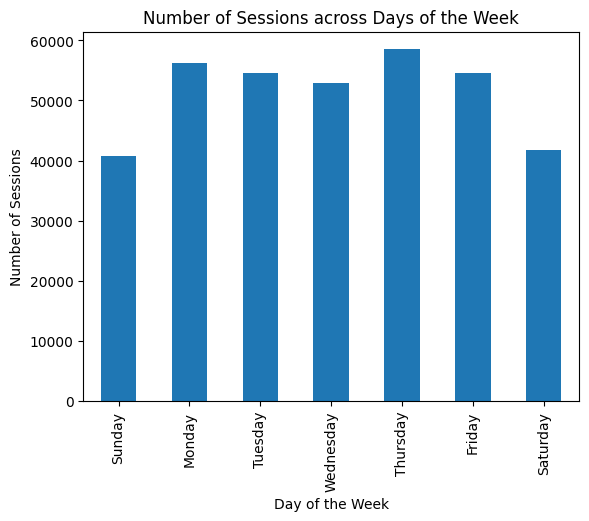

In [95]:
# Let's plot this across days of the week.

visits['day_of_week'] = visits['end ts'].dt.day_name()

# create a new column
sessions_by_day = visits.groupby('day_of_week')['end ts'].size()

# order the days of the week
ordered_days = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']

# Plot the sessions across days of the week
sessions_by_day.loc[ordered_days].plot(kind='bar')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Sessions')
plt.title('Number of Sessions across Days of the Week')
plt.show()

# this result gives us insight as to which days are the busiest!


##### What is the length of each session?

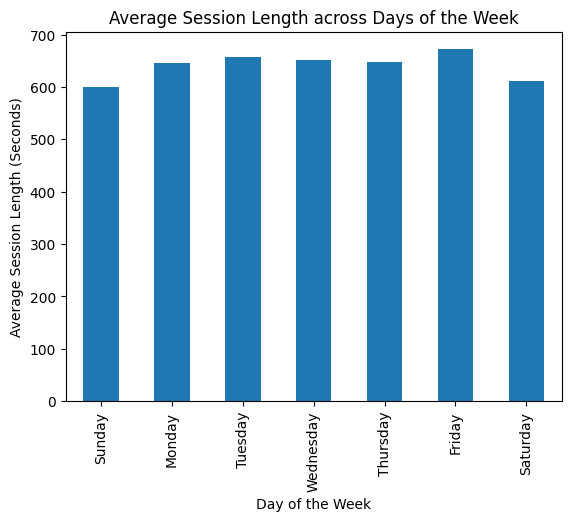

In [96]:
# let's subtract start ts from end ts and create a new column
visits['session_length'] = visits['end ts'] - visits['start ts']

# let's visualize this across days of the week

# Group by day of the week and calculate average session length
avg_session_length = visits.groupby('day_of_week')['session_length'].mean()

# Convert session length to total seconds
avg_session_length = avg_session_length.dt.total_seconds()

# Plotting the average session length across days of the week
avg_session_length.loc[ordered_days].plot(kind='bar')
plt.xlabel('Day of the Week')
plt.ylabel('Average Session Length (Seconds)')
plt.title('Average Session Length across Days of the Week')
plt.show()


##### What's the user retention rate?

In [97]:
# we'll find the first session for each user, named min_visit

min_visit = visits.groupby(['uid'])['start ts'].min().reset_index()
min_visit.columns = ['uid', 'first_session']
min_visit['cohort'] = min_visit['first_session'].dt.to_period('M')
min_visit.head()

,uid,first_session,cohort
0,11863502262781,2018-03-01 17:27:00,2018-03
1,49537067089222,2018-02-06 15:55:00,2018-02
2,297729379853735,2017-06-07 18:47:00,2017-06
3,313578113262317,2017-09-18 22:49:00,2017-09
4,325320750514679,2017-09-30 14:29:00,2017-09


In [98]:
print( min_visit.shape )

print(len(visits.uid.unique()))


(228169, 3)
228169


In [99]:
# now we'll merge that dataset to the original dataset
visits2 = visits.merge(min_visit, how='inner', on=['uid'])
visits2.shape

(359400, 12)

In [100]:
visits2

,device,end ts,source id,start ts,uid,week,month,year,day_of_week,session_length,first_session,cohort
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,51,12,2017-12-20 17:20:00,Wednesday,0 days 00:18:00,2017-12-20 17:20:00,2017-12
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,8,2,2018-02-19 16:53:00,Monday,0 days 00:28:00,2018-02-19 16:53:00,2018-02
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,26,7,2017-07-01 01:54:00,Saturday,0 days 00:00:00,2017-07-01 01:54:00,2017-07
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,20,5,2018-05-20 10:59:00,Sunday,0 days 00:24:00,2018-03-09 20:05:00,2018-03
4,desktop,2018-03-09 20:33:00,4,2018-03-09 20:05:00,16174680259334210214,10,3,2018-03-09 20:05:00,Friday,0 days 00:28:00,2018-03-09 20:05:00,2018-03
...,...,...,...,...,...,...,...,...,...,...,...,...
359395,desktop,2018-04-23 21:19:00,10,2018-04-23 21:11:00,12734910664455613822,17,4,2018-04-23 21:11:00,Monday,0 days 00:08:00,2018-04-23 21:11:00,2018-04
359396,desktop,2017-11-08 13:39:00,4,2017-11-08 13:39:00,6761309174945977743,45,11,2017-11-08 13:39:00,Wednesday,0 days 00:00:00,2017-11-08 13:39:00,2017-11
359397,desktop,2017-07-31 12:31:00,3,2017-07-31 12:13:00,11102751930812818282,31,7,2017-07-31 12:13:00,Monday,0 days 00:18:00,2017-07-31 12:13:00,2017-07
359398,desktop,2018-03-20 15:25:00,4,2018-03-20 15:11:00,272012551460639309,12,3,2018-03-20 15:11:00,Tuesday,0 days 00:14:00,2018-03-20 15:11:00,2018-03


Now we're moving into cohort analysis. Our cohorts and age calculations will be done from a monthly perspective.

We have two parameters:

Cohort: monthly cohort when the user registered/had first session.

age: difference between current session and first_session (kept in 'month' units)

In [101]:
visits2['age'] = ((pd.to_datetime(visits2['start ts'])\
                 - pd.to_datetime(visits2['first_session'])) /  \
                 np.timedelta64(1, 'M')).round().astype('int')
visits2.head()

,device,end ts,source id,start ts,uid,week,month,year,day_of_week,session_length,first_session,cohort,age
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,51,12,2017-12-20 17:20:00,Wednesday,0 days 00:18:00,2017-12-20 17:20:00,2017-12,0
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,8,2,2018-02-19 16:53:00,Monday,0 days 00:28:00,2018-02-19 16:53:00,2018-02,0
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,26,7,2017-07-01 01:54:00,Saturday,0 days 00:00:00,2017-07-01 01:54:00,2017-07,0
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,20,5,2018-05-20 10:59:00,Sunday,0 days 00:24:00,2018-03-09 20:05:00,2018-03,2
4,desktop,2018-03-09 20:33:00,4,2018-03-09 20:05:00,16174680259334210214,10,3,2018-03-09 20:05:00,Friday,0 days 00:28:00,2018-03-09 20:05:00,2018-03,0


In [102]:
# now we can see how many users were active from certain cohorts after registration

cohorts = visits2.pivot_table(
    index='cohort',
    columns='age',
    values='uid',
    aggfunc='nunique'
).fillna(0)

cohorts

age,0,1,2,3,4,5,6,7,8,9,10,11,12
cohort,,,,,,,,,,,,,
2017-06,13259.0,986.0,710.0,813.0,921.0,880.0,847.0,740.0,743.0,661.0,550.0,526.0,176.0
2017-07,13140.0,747.0,680.0,705.0,743.0,640.0,591.0,645.0,489.0,383.0,321.0,71.0,0.0
2017-08,10181.0,705.0,629.0,602.0,522.0,426.0,423.0,345.0,297.0,234.0,33.0,0.0,0.0
2017-09,16704.0,1278.0,1110.0,826.0,669.0,663.0,554.0,429.0,334.0,43.0,0.0,0.0,0.0
2017-10,25977.0,1911.0,1367.0,996.0,949.0,808.0,549.0,464.0,85.0,0.0,0.0,0.0,0.0
2017-11,27248.0,1894.0,1260.0,1058.0,861.0,655.0,506.0,72.0,0.0,0.0,0.0,0.0,0.0
2017-12,25268.0,1300.0,1034.0,735.0,546.0,409.0,70.0,0.0,0.0,0.0,0.0,0.0,0.0
2018-01,22624.0,1219.0,812.0,584.0,389.0,42.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2018-02,22197.0,1070.0,590.0,403.0,45.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [103]:
retention = cohorts.iloc[:,0:].div(cohorts[0], axis=0)
retention

age,0,1,2,3,4,5,6,7,8,9,10,11,12
cohort,,,,,,,,,,,,,
2017-06,1.0,0.074365,0.053549,0.061317,0.069462,0.066370,0.063881,0.055811,0.056037,0.049853,0.041481,0.039671,0.013274
2017-07,1.0,0.056849,0.051750,0.053653,0.056545,0.048706,0.044977,0.049087,0.037215,0.029148,0.024429,0.005403,0.000000
2017-08,1.0,0.069247,0.061782,0.059130,0.051272,0.041843,0.041548,0.033887,0.029172,0.022984,0.003241,0.000000,0.000000
2017-09,1.0,0.076509,0.066451,0.049449,0.040050,0.039691,0.033166,0.025682,0.019995,0.002574,0.000000,0.000000,0.000000
2017-10,1.0,0.073565,0.052623,0.038342,0.036532,0.031104,0.021134,0.017862,0.003272,0.000000,0.000000,0.000000,0.000000
2017-11,1.0,0.069510,0.046242,0.038829,0.031599,0.024038,0.018570,0.002642,0.000000,0.000000,0.000000,0.000000,0.000000
2017-12,1.0,0.051448,0.040921,0.029088,0.021608,0.016186,0.002770,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2018-01,1.0,0.053881,0.035891,0.025813,0.017194,0.001856,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2018-02,1.0,0.048205,0.026580,0.018156,0.002027,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


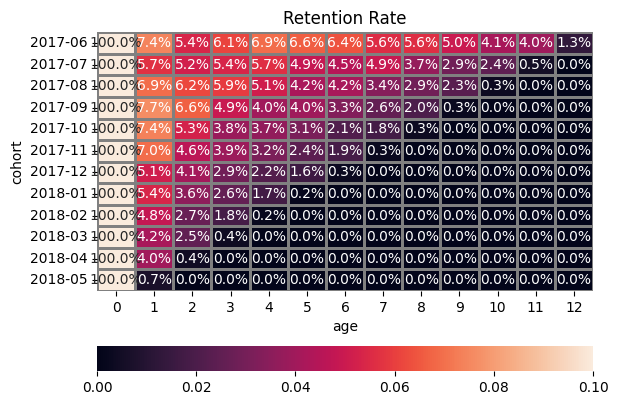

In [104]:
# now we can visualize it!

import seaborn as sns

retention.index = retention.index.astype(str)
sns.heatmap(retention, annot=True, fmt='.1%', linewidths=1, linecolor='grey', vmax=0.1,\
           cbar_kws= {'orientation': 'horizontal'}).set(title = 'Retention Rate')

plt.show()

##### When do people start buying?

In [105]:
# creating the first order

first_order = orders.groupby(['uid'])['buy ts'].min().reset_index()
first_order.columns = ['uid', 'first_buy_ts']

display( first_order.head() )

print(visits2.shape )
visits_3 = visits2.merge(first_order, on='uid' )
print(visits_3.shape )

,uid,first_buy_ts
0,313578113262317,2018-01-03 21:51:00
1,1575281904278712,2017-06-03 10:13:00
2,2429014661409475,2017-10-11 18:33:00
3,2464366381792757,2018-01-28 15:54:00
4,2551852515556206,2017-11-24 10:14:00


(359400, 13)
(97394, 14)


In [107]:
# we will create a new dataframe called revenue_user that displays the total revenue for each user

revenue_user = orders.groupby('uid')['revenue'].sum().reset_index()
revenue_user.columns = ['uid','total_revenue']
revenue_user.head()

# we'll make a similar dataframe that displays the number of orders per user
order_count_user =  orders.groupby('uid')['revenue'].count().reset_index()
order_count_user.columns = ['uid','count_orders']
order_count_user.head()


,uid,count_orders
0,313578113262317,1
1,1575281904278712,2
2,2429014661409475,1
3,2464366381792757,1
4,2551852515556206,2


In [108]:
orders

,buy ts,revenue,uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450
...,...,...,...
50410,2018-05-31 23:50:00,4.64,12296626599487328624
50411,2018-05-31 23:50:00,5.80,11369640365507475976
50412,2018-05-31 23:54:00,0.30,1786462140797698849
50413,2018-05-31 23:56:00,3.67,3993697860786194247


In [109]:
print(visits.shape)
orders_source = visits[['source id','uid']]

orders_source = orders_source.drop_duplicates()
print(orders_source.shape)

orders_source = pd.merge(orders_source, order_count_user, on='uid')
orders_source = pd.merge(orders_source, revenue_user, on='uid')

# let's confirm that the number of buyers is smaller than the number of overall users, as the opposite cannot be true and there would be an error!
print(orders_source.shape)

(359400, 10)
(277870, 2)
(57265, 4)


In [110]:
# here's a new dataframe with order count and total revenue for each user!
orders_source

,source id,uid,count_orders,total_revenue
0,9,16174680259334210214,1,2.33
1,4,16174680259334210214,1,2.33
2,5,16007536194108375387,3,5.50
3,3,16007536194108375387,3,5.50
4,4,16007536194108375387,3,5.50
...,...,...,...,...
57260,3,6752020629696526518,1,4.15
57261,4,11750532881998794555,1,3.67
57262,4,11202626539189016002,1,3.05
57263,10,12734910664455613822,1,0.49


In [111]:
# details on total revenue - the average spend, maximum amount spent
orders_source.total_revenue.describe()

count    57265.000000
mean        10.352067
std        136.258793
min          0.000000
25%          1.530000
50%          3.050000
75%          6.350000
max      11810.180000
Name: total_revenue, dtype: float64

In [112]:
# looks like the average number of orders for users is 1.74!
orders_source.count_orders.describe()

count    57265.000000
mean         1.748957
std          5.907515
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max        239.000000
Name: count_orders, dtype: float64

In [113]:
# we'll create a dataframe that groups total revenue for each source
orders_source.groupby('source id')['total_revenue'].sum().reset_index()

,source id,total_revenue
0,1,101631.38
1,2,113524.51
2,3,119193.48
3,4,119899.47
4,5,111532.65
5,7,1.22
6,9,18809.68
7,10,8218.72


In [114]:
# and a dataframe that displays total order count per source - which would be helpful when we're looking to see which sources provide the best traffic!
orders_source.groupby('source id')['count_orders'].mean().reset_index()

,source id,count_orders
0,1,2.144578
1,2,2.141547
2,3,1.583562
3,4,1.578264
4,5,1.735920
5,7,1.000000
6,9,1.687433
7,10,1.374506


In [115]:
visits_3['first_buy_ts'].describe()

C:\Users\Michael\AppData\Local\Temp\ipykernel_12408\3247352149.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  visits_3['first_buy_ts'].describe()


count                   97394
unique                  34122
top       2017-06-05 16:42:00
freq                      615
first     2017-06-01 00:10:00
last      2018-06-01 00:02:00
Name: first_buy_ts, dtype: object

In [116]:
# here's the time when each cohort made their first purchase
visits_3.groupby('cohort')['first_buy_ts'].mean()

cohort
2017-06   2017-08-14 15:15:47.645814016
2017-07   2017-09-16 12:09:16.252265216
2017-08   2017-10-14 18:14:41.114718720
2017-09   2017-10-26 03:37:15.694220800
2017-10   2017-11-10 15:20:23.016461312
2017-11   2017-12-11 17:19:14.798117376
2017-12   2017-12-31 02:32:33.505860352
2018-01   2018-01-29 07:36:43.042635776
2018-02   2018-02-21 23:10:21.041804800
2018-03   2018-03-19 22:45:55.269616896
2018-04   2018-04-20 15:18:13.553571328
2018-05   2018-05-21 05:26:59.128512768
Freq: M, Name: first_buy_ts, dtype: datetime64[ns]

In [142]:
visits_3

,device,end ts,source id,start ts,uid,week,month,year,day_of_week,session_length,first_session,cohort,age,first_buy_ts,conversion
0,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,20,5,2018-05-20 10:59:00,Sunday,0 days 00:24:00,2018-03-09 20:05:00,2018-03,2,2018-03-09 20:25:00,0
1,desktop,2018-03-09 20:33:00,4,2018-03-09 20:05:00,16174680259334210214,10,3,2018-03-09 20:05:00,Friday,0 days 00:28:00,2018-03-09 20:05:00,2018-03,0,2018-03-09 20:25:00,0
2,desktop,2017-09-03 21:36:00,5,2017-09-03 21:35:00,16007536194108375387,35,9,2017-09-03 21:35:00,Sunday,0 days 00:01:00,2017-09-03 21:35:00,2017-09,0,2017-09-04 12:46:00,0
3,desktop,2017-10-27 16:02:00,3,2017-10-27 15:20:00,16007536194108375387,43,10,2017-10-27 15:20:00,Friday,0 days 00:42:00,2017-09-03 21:35:00,2017-09,2,2017-09-04 12:46:00,0
4,desktop,2017-09-04 17:56:00,4,2017-09-04 17:37:00,16007536194108375387,36,9,2017-09-04 17:37:00,Monday,0 days 00:19:00,2017-09-03 21:35:00,2017-09,0,2017-09-04 12:46:00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97389,desktop,2017-12-04 12:50:00,3,2017-12-04 12:42:00,6752020629696526518,49,12,2017-12-04 12:42:00,Monday,0 days 00:08:00,2017-12-04 12:42:00,2017-12,0,2017-12-04 12:46:00,0
97390,desktop,2017-11-20 23:44:00,4,2017-11-20 23:33:00,11750532881998794555,47,11,2017-11-20 23:33:00,Monday,0 days 00:11:00,2017-11-20 23:33:00,2017-11,0,2017-11-20 23:43:00,0
97391,touch,2017-11-29 20:48:00,4,2017-11-29 20:27:00,11202626539189016002,48,11,2017-11-29 20:27:00,Wednesday,0 days 00:21:00,2017-11-29 20:27:00,2017-11,0,2017-11-29 20:33:00,0
97392,desktop,2018-04-23 21:19:00,10,2018-04-23 21:11:00,12734910664455613822,17,4,2018-04-23 21:11:00,Monday,0 days 00:08:00,2018-04-23 21:11:00,2018-04,0,2018-04-23 21:16:00,0


In [143]:
# we'll calculate average conversion time

visits_3['conversion']=((pd.to_datetime(visits_3['first_buy_ts'])-pd.to_datetime(visits_3['first_session']))/np.timedelta64(1,'D')).astype('int')

In [144]:
# now we can plot it

fig = px.histogram(visits_3, x="conversion",nbins=30)
fig.show()

##### How many orders do they make during a given period of time?

In [120]:
# First let's select a date range

start_date = pd.to_datetime('2017-06-01')
end_date = pd.to_datetime('2017-07-01')

# filter orders based on the range

filtered_orders = orders[(orders['buy ts'] >= start_date) & (orders['buy ts'] <= end_date)]

# now we can group orders by user ID & count the number of orders per user
order_counts = filtered_orders.groupby('uid')['buy ts'].count()

# sum the orders up!
total_orders = order_counts.sum()

print('Total number of orders during the month of June, 2017:', total_orders)

Total number of orders during the month of June, 2017: 2354


##### What is the average purchase size?

In [121]:
# This can be done fairly easily - we just need to find the mean!

average_purchase_size = orders['revenue'].mean()

print('Average Purchase Size: ', average_purchase_size)

Average Purchase Size:  4.999646930477041


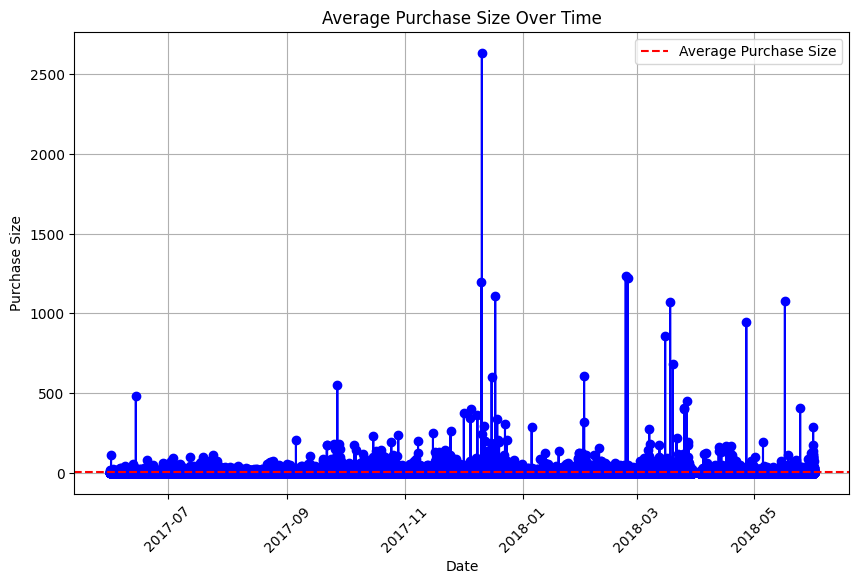

In [122]:
# now we can plot the average purchase size overtime:

plt.figure(figsize=(10, 6))
plt.plot(orders['buy ts'], orders['revenue'], marker='o', linestyle='-', color='blue')
plt.axhline(y=average_purchase_size, linestyle='--', color='red', label='Average Purchase Size')
plt.xlabel('Date')
plt.ylabel('Purchase Size')
plt.title('Average Purchase Size Over Time')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

##### How much money do they bring? (LTV)

In [123]:
# now merging to the original dataset
orders_2=orders.merge(min_visit, how='inner',on=['uid'])
orders_2.head()

,buy ts,revenue,uid,first_session,cohort
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01 00:09:00,2017-06
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01 00:14:00,2017-06
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01 00:25:00,2017-06
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01 00:14:00,2017-06
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01 07:31:00,2017-06


In [124]:
# looking to find average revenue per user for each month

first_order_date_by_customers = orders_2.groupby('uid')['buy ts'].min()

first_order_date_by_customers.name = 'first_order_date'

orders_2 = orders_2.join(first_order_date_by_customers, on='uid', rsuffix='_r')
orders_2['first_order_month'] = orders_2['first_order_date'].astype('datetime64[M]')
orders_2['order_month'] = orders_2['buy ts'].astype('datetime64[M]')

orders_grouped_by_cohorts = orders_2.groupby(['first_order_month', 'order_month']).agg({'revenue': 'sum', 'uid': 'nunique'})

print(orders_grouped_by_cohorts.head())

                                         revenue  uid
first_order_month   order_month                      
2017-06-01 00:10:00 2017-06-01 00:10:00    17.00    1
2017-06-01 00:25:00 2017-06-01 00:25:00     0.55    1
2017-06-01 00:27:00 2017-06-01 00:27:00     0.37    1
2017-06-01 00:29:00 2017-06-01 00:29:00     0.55    1
2017-06-01 07:58:00 2017-06-01 07:58:00     0.37    1


In [125]:
# to find reveneue per user, we'll divide revenue by the number of uid values

orders_grouped_by_cohorts['revenue_per_user'] = (orders_grouped_by_cohorts['revenue'] / orders_grouped_by_cohorts['uid'])

In [126]:
# Let's find the LTV. We need to find the date of each customer's purchase

orders_2['order_month'] = orders_2['buy ts'].astype('datetime64[M]')
costs['month'] = costs['dt'].astype('datetime64[M]')

first_orders = orders_2.groupby('uid').agg({'order_month': 'min'}).reset_index()
first_orders.columns = ['uid', 'order_month']

# convert 'first_order_month' column to proper month format
first_orders['order_month'] = pd.to_datetime(first_orders['order_month']).dt.to_period('M')

# Display the updated dataframe
first_orders.head()

,uid,order_month
0,313578113262317,2018-01
1,1575281904278712,2017-06
2,2429014661409475,2017-10
3,2464366381792757,2018-01
4,2551852515556206,2017-11


In [127]:
# great, looking good. 1st step complete - now we'll calculate the number of buyers for each month

cohort_sizes = first_orders.groupby('order_month').agg({'uid': 'nunique'}).reset_index()
cohort_sizes.columns = ['order_month', 'n_buyers']
cohort_sizes.head()

,order_month,n_buyers
0,2017-06,2023
1,2017-07,1923
2,2017-08,1370
3,2017-09,2581
4,2017-10,4340


In [128]:
# changing order_month to datetime, shortened to month
orders_2['order_month'] = pd.to_datetime(orders_2['order_month']).dt.to_period('M')

In [129]:
orders_2.head()

,buy ts,revenue,uid,first_session,cohort,first_order_date,first_order_month,order_month
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01 00:09:00,2017-06,2017-06-01 00:10:00,2017-06-01 00:10:00,2017-06
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01 00:14:00,2017-06,2017-06-01 00:25:00,2017-06-01 00:25:00,2017-06
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01 00:25:00,2017-06,2017-06-01 00:27:00,2017-06-01 00:27:00,2017-06
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01 00:14:00,2017-06,2017-06-01 00:29:00,2017-06-01 00:29:00,2017-06
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01 07:31:00,2017-06,2017-06-01 07:58:00,2017-06-01 07:58:00,2017-06


In [130]:
orders_source.head()

,source id,uid,count_orders,total_revenue
0,9,16174680259334210214,1,2.33
1,4,16174680259334210214,1,2.33
2,5,16007536194108375387,3,5.50
3,3,16007536194108375387,3,5.50
4,4,16007536194108375387,3,5.50


In [131]:
visits2.head()

,device,end ts,source id,start ts,uid,week,month,year,day_of_week,session_length,first_session,cohort,age
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,51,12,2017-12-20 17:20:00,Wednesday,0 days 00:18:00,2017-12-20 17:20:00,2017-12,0
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,8,2,2018-02-19 16:53:00,Monday,0 days 00:28:00,2018-02-19 16:53:00,2018-02,0
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,26,7,2017-07-01 01:54:00,Saturday,0 days 00:00:00,2017-07-01 01:54:00,2017-07,0
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,20,5,2018-05-20 10:59:00,Sunday,0 days 00:24:00,2018-03-09 20:05:00,2018-03,2
4,desktop,2018-03-09 20:33:00,4,2018-03-09 20:05:00,16174680259334210214,10,3,2018-03-09 20:05:00,Friday,0 days 00:28:00,2018-03-09 20:05:00,2018-03,0


In [132]:
# let's get revenue per cohort in each month
ltv_cohort=orders_2.groupby(['order_month','cohort'])['revenue'].sum().reset_index()
ltv_cohort.columns = ['order_month','cohort','revenue']

ltv_cohort=ltv_cohort.merge(cohort_sizes, on=['order_month'])
# now we can merge with the cohort size



In [133]:
ltv_cohort.head()

,order_month,cohort,revenue,n_buyers
0,2017-06,2017-06,9557.49,2023
1,2017-07,2017-06,2664.58,1923
2,2017-07,2017-07,9874.89,1923
3,2017-08,2017-06,1464.69,1370
4,2017-08,2017-07,1059.28,1370


In [134]:
# now, we'll ensure that both cohort and order month are properly in datetime. We don't need to display them, we just need to make sure it works!
ltv_cohort['cohort_datetime'] = ltv_cohort['cohort'].apply(lambda x: x.to_timestamp() )
ltv_cohort['order_month_datetime'] = ltv_cohort['order_month'].apply(lambda x: x.to_timestamp() )

ltv_cohort['age_month']=((  ltv_cohort['order_month_datetime'] - ltv_cohort['cohort_datetime']) / np.timedelta64(1,'M')).round()
ltv_cohort['ltv']=ltv_cohort['revenue']/ltv_cohort['n_buyers']

del ltv_cohort['cohort_datetime']
del ltv_cohort['order_month_datetime']

ltv_cohort.head()

,order_month,cohort,revenue,n_buyers,age_month,ltv
0,2017-06,2017-06,9557.49,2023,0.0,4.724414
1,2017-07,2017-06,2664.58,1923,1.0,1.385637
2,2017-07,2017-07,9874.89,1923,0.0,5.135148
3,2017-08,2017-06,1464.69,1370,2.0,1.069117
4,2017-08,2017-07,1059.28,1370,1.0,0.773197


In [135]:
# let's plot it! first let's build the pivot table

ltv_cohort_piv=ltv_cohort.pivot_table(
    index='order_month', 
    columns='age_month', 
    values='ltv', 
    aggfunc='sum'
).cumsum(axis=1)

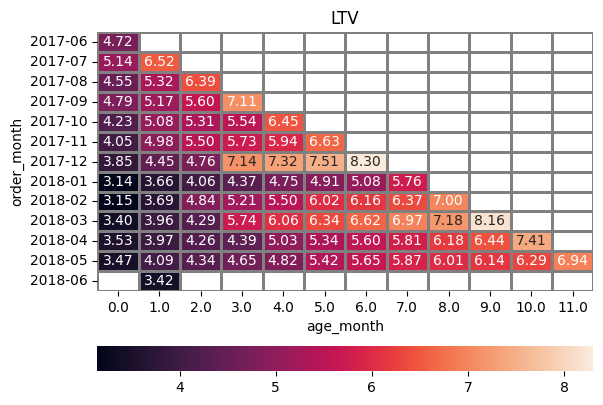

In [136]:
# now we'll create the visual

ltv_cohort_piv.index=ltv_cohort_piv.index.astype(str)
sns.heatmap(ltv_cohort_piv, annot=True, fmt='.2f', linewidths=1, linecolor='grey', cbar_kws= {'orientation': 'horizontal'} 
            ).set(title ='LTV')
plt.show()

In [137]:
# we'll now group the table of orders by month of first purchase and month of purchase, then sum up revenue

cohorts = orders_2.groupby(['cohort', 'order_month']).agg({'revenue': 'sum'}).reset_index()
cohorts.head()

,cohort,order_month,revenue
0,2017-06,2017-06,9557.49
1,2017-06,2017-07,2664.58
2,2017-06,2017-08,1464.69
3,2017-06,2017-09,3882.09
4,2017-06,2017-10,3940.59


In [138]:
# adding data on how many users made their first purchases in each month to the cohorts table, and how much revenue was brought in

report = pd.merge(cohort_sizes, cohorts, on='order_month')
report.head()

,order_month,n_buyers,cohort,revenue
0,2017-06,2023,2017-06,9557.49
1,2017-07,1923,2017-06,2664.58
2,2017-07,1923,2017-07,9874.89
3,2017-08,1370,2017-06,1464.69
4,2017-08,1370,2017-07,1059.28


##### How much money was spent? Overall, per source and over time.

In [390]:
# for reference, here's our costs table
costs.head()

,source_id,dt,costs,year,month,week
0,1,2017-06-01,75.20,2017-06-01,2017-06-01,2017-06-01
1,1,2017-06-02,62.25,2017-06-02,2017-06-02,2017-06-02
2,1,2017-06-03,36.53,2017-06-03,2017-06-03,2017-06-03
3,1,2017-06-04,55.00,2017-06-04,2017-06-04,2017-06-04
4,1,2017-06-05,57.08,2017-06-05,2017-06-05,2017-06-05


In [391]:
# sorting by the date & source id
costs = costs.sort_values(by=['dt', 'source_id'])
costs.head()

,source_id,dt,costs,year,month,week
0,1,2017-06-01,75.20,2017-06-01,2017-06-01,2017-06-01
363,2,2017-06-01,132.56,2017-06-01,2017-06-01,2017-06-01
726,3,2017-06-01,349.38,2017-06-01,2017-06-01,2017-06-01
1089,4,2017-06-01,76.74,2017-06-01,2017-06-01,2017-06-01
1452,5,2017-06-01,73.24,2017-06-01,2017-06-01,2017-06-01


In [392]:
# First let's sum up the amount of money that was spent in the costs dataframe!

overall_money_spent = costs['costs'].sum()
print('Overall Money Spent: ', overall_money_spent)

Overall Money Spent:  329131.62


In [393]:
# now let's group the amount by source. 'source id' is the column we're looking for.

money_spent_per_source = costs.groupby('source_id')['costs'].sum()
money_spent_per_source.head()

source_id
1     20833.27
2     42806.04
3    141321.63
4     61073.60
5     51757.10
Name: costs, dtype: float64

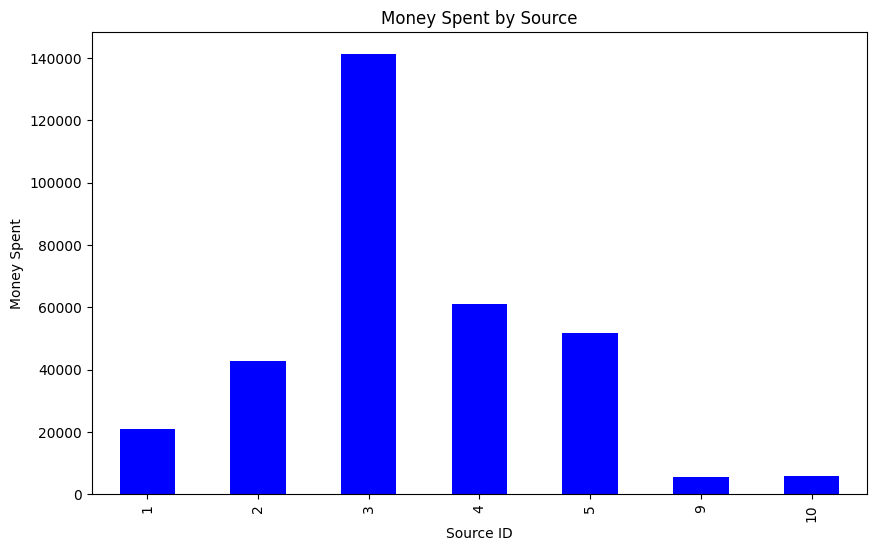

In [394]:
# Plotting the money spent by source as a bar chart
plt.figure(figsize=(10, 6))
money_spent_per_source.plot(kind='bar', color='b')
plt.xlabel('Source ID')
plt.ylabel('Money Spent')
plt.title('Money Spent by Source')
plt.show()

##### We are spending the most money to acquire users from source ID #3!

In [395]:
# let's group the amount by time:

money_spent_over_time = costs.groupby('dt')['costs'].sum()
money_spent_over_time.head()

dt
2017-06-01    735.26
2017-06-02    721.19
2017-06-03    450.85
2017-06-04    761.16
2017-06-05    821.44
Name: costs, dtype: float64

In [396]:
# how much has been spent in total?
print('Total amount spent is is {}'.format(costs['costs'].sum()))

Total amount spent is is 329131.62


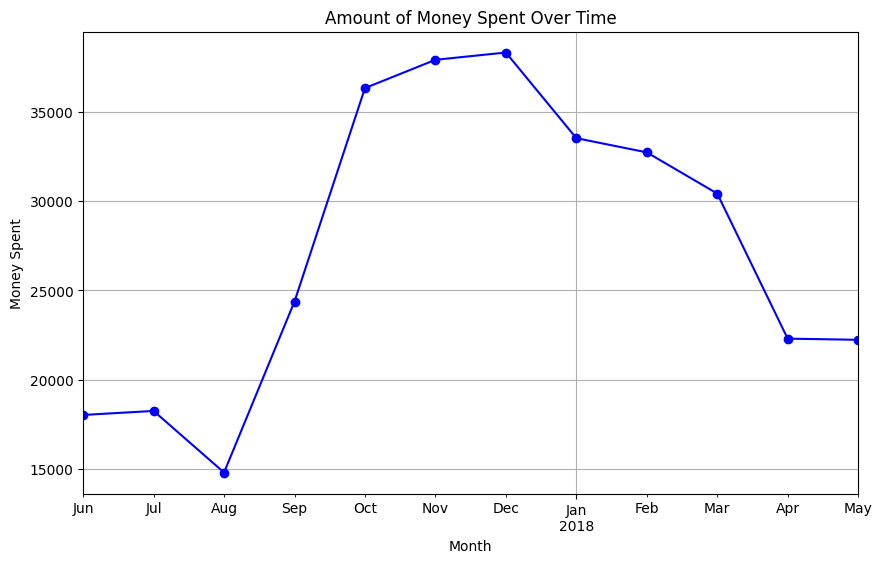

In [397]:
# now let's plot it!

# Group by month and calculate the sum of costs
money_spent_over_time = costs.groupby(costs['dt'].dt.to_period('M'))['costs'].sum()

# Plotting the amount of money spent over time
plt.figure(figsize=(10, 6))
money_spent_over_time.plot(kind='line', marker='o', linestyle='-', color='b')
plt.xlabel('Month')
plt.ylabel('Money Spent')
plt.title('Amount of Money Spent Over Time')
plt.grid(True)
plt.show()

##### How much did customer acquisition from each of the sources cost?

In [145]:
# let's take a look at our costs table again
costs.info()
costs.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   source_id  2542 non-null   int64         
 1   dt         2542 non-null   datetime64[ns]
 2   costs      2542 non-null   float64       
 3   year       2542 non-null   datetime64[ns]
 4   month      2542 non-null   datetime64[ns]
 5   week       2542 non-null   datetime64[ns]
dtypes: datetime64[ns](4), float64(1), int64(1)
memory usage: 119.3 KB


,source_id,dt,costs,year,month,week
0,1,2017-06-01,75.20,2017-06-01,2017-06-01,2017-06-01
1,1,2017-06-02,62.25,2017-06-02,2017-06-02,2017-06-02
2,1,2017-06-03,36.53,2017-06-03,2017-06-03,2017-06-03
3,1,2017-06-04,55.00,2017-06-04,2017-06-04,2017-06-04
4,1,2017-06-05,57.08,2017-06-05,2017-06-05,2017-06-05


In [146]:
# we'll create a dataframe that shows us how much money was spent on each source (we saw this in our visual above!)
costs_per_source = costs.groupby(['source_id'])['costs'].sum().reset_index()
costs_per_source.head()

,source_id,costs
0,1,20833.27
1,2,42806.04
2,3,141321.63
3,4,61073.60
4,5,51757.10


In [163]:
orders_2.head()

,buy ts,revenue,uid,first_session,cohort,first_order_date,first_order_month,order_month,first_source
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01 00:09:00,2017-06,2017-06-01 00:10:00,2017-06-01 00:10:00,2017-06,1
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01 00:14:00,2017-06,2017-06-01 00:25:00,2017-06-01 00:25:00,2017-06,2
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01 00:25:00,2017-06,2017-06-01 00:27:00,2017-06-01 00:27:00,2017-06,2
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01 00:14:00,2017-06,2017-06-01 00:29:00,2017-06-01 00:29:00,2017-06,2
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01 07:31:00,2017-06,2017-06-01 07:58:00,2017-06-01 07:58:00,2017-06,3


In [165]:
revenue_per_source = orders_2.groupby(['first_source'])['revenue'].sum().reset_index()
revenue_per_source.head()

,first_source,revenue
0,1,31090.55
1,2,46923.61
2,3,54511.24
3,4,56696.83
4,5,52624.02


<Axes: title={'center': 'Acquisition costs per month'}, xlabel='month'>

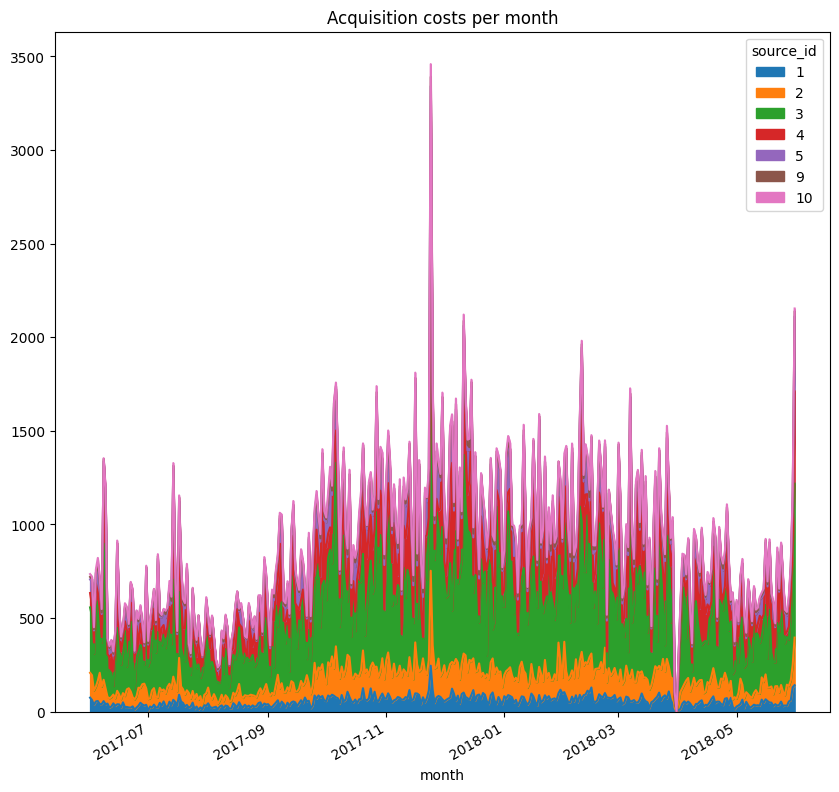

In [149]:
# displaying the cost per source each day
costs.pivot_table(
    index='month',
    columns='source_id',
    values='costs',
    aggfunc='sum'
).plot.area(figsize=(10, 10), title='Acquisition costs per month')

In [150]:
# we can get the source of each user with the following:

visits2.groupby(['uid'])['source id'].nunique().head()

uid
11863502262781     1
49537067089222     1
297729379853735    1
313578113262317    1
325320750514679    1
Name: source id, dtype: int64

In [151]:
# we will define the first source that they came from as the main source

first_source = visits2.sort_values('start ts').groupby('uid').first()['source id'].reset_index()
first_source.columns = ['uid', 'first_source']
first_source.head()

,uid,first_source
0,11863502262781,3
1,49537067089222,2
2,297729379853735,3
3,313578113262317,2
4,325320750514679,5


In [152]:
# merging the orders and first source
orders_2 = orders_2.merge(first_source, on=['uid'], how='left')
orders_2.head()

,buy ts,revenue,uid,first_session,cohort,first_order_date,first_order_month,order_month,first_source
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01 00:09:00,2017-06,2017-06-01 00:10:00,2017-06-01 00:10:00,2017-06,1
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01 00:14:00,2017-06,2017-06-01 00:25:00,2017-06-01 00:25:00,2017-06,2
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01 00:25:00,2017-06,2017-06-01 00:27:00,2017-06-01 00:27:00,2017-06,2
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01 00:14:00,2017-06,2017-06-01 00:29:00,2017-06-01 00:29:00,2017-06,2
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01 07:31:00,2017-06,2017-06-01 07:58:00,2017-06-01 07:58:00,2017-06,3


In [154]:
# we're now finding the costs, but this time broken down by source id
costs_by_month_source=costs.groupby(['month','source_id'])['costs'].sum().reset_index()
costs_by_month_source.head()

,month,source_id,costs
0,2017-06-01,1,75.20
1,2017-06-01,2,132.56
2,2017-06-01,3,349.38
3,2017-06-01,4,76.74
4,2017-06-01,5,73.24


In [159]:
# let's make the source column uniform with the other dataframes
orders_2.rename(columns={'source': 'source_id'})

# getting buyers per month by source
buyers_per_month_source=orders_2.groupby(['order_month','first_source'])['uid'].nunique().reset_index()
buyers_per_month_source.columns=['month','source','buyers']
buyers_per_month_source.head()

,month,source,buyers
0,2017-06,1,190
1,2017-06,2,235
2,2017-06,3,638
3,2017-06,4,413
4,2017-06,5,384


In [161]:
# finding CAC per month by source

CAC_per_month_source = costs_by_month_source.merge(buyers_per_month_source, how='left', on=['month'])
CAC_per_month_source['CAC'] = CAC_per_month_source['costs']/CAC_per_month_source['buyers']
CAC_per_month_source['month'] = CAC_per_month_source['month']
CAC_per_month_source.head()

,month,source_id,costs,source,buyers,CAC
0,2017-06-01 00:00:00,1,75.20,NaN,NaN,NaN
1,2017-06-01 00:00:00,2,132.56,NaN,NaN,NaN
2,2017-06-01 00:00:00,3,349.38,NaN,NaN,NaN
3,2017-06-01 00:00:00,4,76.74,NaN,NaN,NaN
4,2017-06-01 00:00:00,5,73.24,NaN,NaN,NaN


##### How worthwhile where the investments? (ROI)

In [169]:
# Remember that ROI of an ad campaign is (income - expenses) / expenses

costs_per_source.head()


,source_id,costs
0,1,20833.27
1,2,42806.04
2,3,141321.63
3,4,61073.60
4,5,51757.10


In [170]:
revenue_per_source.head()

,first_source,revenue
0,1,31090.55
1,2,46923.61
2,3,54511.24
3,4,56696.83
4,5,52624.02


In [171]:
# let's put costs and revenue into the same dataframe
revenue_and_costs = pd.merge(costs_per_source, revenue_per_source, left_on='source_id', right_on='first_source')
revenue_and_costs.head()

,source_id,costs,first_source,revenue
0,1,20833.27,1,31090.55
1,2,42806.04,2,46923.61
2,3,141321.63,3,54511.24
3,4,61073.60,4,56696.83
4,5,51757.10,5,52624.02


In [176]:
# let's find ROI!
revenue_and_costs['ROI'] = (revenue_and_costs['revenue'] - revenue_and_costs['costs']) / revenue_and_costs['costs']
revenue_and_costs.head(10)

,source_id,costs,first_source,revenue,ROI
0,1,20833.27,1,31090.55,0.492351
1,2,42806.04,2,46923.61,0.096191
2,3,141321.63,3,54511.24,-0.614275
3,4,61073.60,4,56696.83,-0.071664
4,5,51757.10,5,52624.02,0.016750
5,9,5517.49,9,5759.40,0.043844
6,10,5822.49,10,4450.33,-0.235665


In [179]:
fig = px.bar(revenue_and_costs, x='source_id', y=['costs', 'revenue'],
             barmode='group',
             labels={'value': 'Amount'},
             title='Costs vs Revenue per Source')
fig.show()

## Conclusion

##### After extensive analysis of the data, we have some obvious conclusions about where the marketing team should focus their resources.

##### Firstly, source #3 costs us, by far, the most money - and the return on that marketing investment is negative! Sources #1 and to a lesser extent #2 cost us less money, and yield a much higher return. Specifically, we recommend the marketing team focus most, if not all of the source #3 spend on source #1.

##### Source #10 is the most deeply negative return on marketing investment. We don't spend a lot of money on that source, but in the interest of focusing our resources, we should halt traffic from source #10 as it is returning the least! We can focus those resources on source #1 as well.

##### For traffic sources #5 and #9, the ROI is not huge, but our unit economics are in our favor, meaning we can ramp up our marketing resources there and expect to scale revenue proportionally.



##### To get more granular, we learned in our analysis that we typically see the most user activity on Mondays and specifically Thursdays. We can lean into this by increasing our marketing outreach on these days. We can also work to improve our LTV and retention rate by running promotions for existing users on the days where the most users are active (Mondays & Thursdays), or when users spend the most time with us (Fridays)

##### Looking at our average purchase size over time, we can see that users have the highest average spend during the Holiday months. We can ramp up our marketing resources through the channels mentioned above in the months coming up to the Holiday months, to maximize the retained users for their highest average spends. We see that our highest retention rates are between 1-5 months, so we'd want to begin to ramp up marketing late in the 3rd Quarter, before the 4th Quarter begins.

#### Thank you so much for taking the time to read this analysis! We found many tangible ways to effectively improve our marketing spend, as well as found areas for improvement in terms of user retention and revenue.